<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 12</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

<p>**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)</p>

<p>**Abgabe**: Montag, 11. Juli, 2016 vor der Vorlesung</p>

<p>**Name**: <font color="red">Bitte geben Sie ihren Namen an</font></p>

<p>**Matrikelnummer**: <font color="red">Bitte geben Sie ihre Matrikelnummer an</font></p><br />


<table style="border-style: none; width: 100%; margin-top: 20px; padding: 0px;"
><tr style="border-style: none; margin: 0px; padding: 0px;">
<td style="border-style: none; width: 80%; margin: 0px; padding: 0px; font-size: 20px; font-weight: bold">Was wächsten denn da?</td>
<td style="border-style: none; width: 20%; margin: 0px; padding: 0px; text-align: right">(3 Bonuspunkte)</td></tr></table>

Seltsame (aber schön anzuschauende) **Attraktoren iterativer Verfahren** haben wir mit dem Gumowski-Mira Attraktor bereits auf dem ersten Übungsblatt kennengelernt. Hier wollen wir einen neuen Attraktor kennenlernen, welcher einem
**nicht-deterministischen iterativen Verfahren** innewohnt. 

Schreiben Sie dazu ein Programm  zur Berechnung der folgenden Sequenz von Koordinaten $(x_n,y_n)$
\begin{equation}
  \left(\begin{matrix}
  x_{n+1} \\ y_{n+1}
  \end{matrix}\right) = \left(\begin{matrix} a \quad b \\  c \quad d \end{matrix}\right) \left(\begin{matrix}x_{n} \\ y_{n}\end{matrix}\right) + \left(\begin{matrix}e \\ f\end{matrix}\right)
\end{equation}
wobei die einzelnen Transformations-Elemente $a,b, \ldots, e$ noch zu spezifizieren sind.

Insbesondere wollen wir *vier* unterschiedliche Transformationen $T_i$ definieren, welche mit gewissen Wahrscheinlichkeiten $p_i$ *zufällig* angewandt werden sollen. Diese seien

\begin{align}
 T_1: \quad\quad & \left(\begin{matrix} +0.85 \quad +0.04 \\  -0.04 \quad  +0.85 \end{matrix}\right) & \left(\begin{matrix}0.00 \\ 1.60\end{matrix}\right)   & \quad\quad p_1 = 0.85 \\
 \\
 T_2: \quad\quad & \left(\begin{matrix} +0.20 \quad -0.26 \\  +0.23 \quad  +0.22 \end{matrix}\right) & \left(\begin{matrix}0.00 \\ 1.60\end{matrix}\right)   & \quad\quad p_2 = 0.07 \\
 \\
 T_3: \quad\quad & \left(\begin{matrix} -0.15 \quad  +0.28 \\  +0.26 \quad  +0.24 \end{matrix}\right) & \left(\begin{matrix}0.00 \\ 0.44\end{matrix}\right) & \quad\quad p_3 = 0.07 \\
 \\
 T_4: \quad\quad & \left(\begin{matrix} \pm0.00 \quad \pm0.00 \\   \pm0.00 \quad  +0.16 \end{matrix}\right) & \left(\begin{matrix}0.00 \\ 0.00\end{matrix}\right)      & \quad\quad p_4 = 0.01 \\
\end{align}

In [1]:
T1 = [+0.85 +0.04 ; -0.04 +0.85]
b1 = [0.00 , 1.60]
p1 = 0.85

T2 = [+0.20 -0.26 ; +0.23 +0.22]
b2 = [0.00 , 1.60]
p2 = 0.07

T3 = [-0.15 +0.28 ; +0.26 +0.24]
b3 = [0.00 , 0.44]
p3 = 0.07

T4 = [0.00   0.00 ;  0.00 +0.16]
b4 = [0.00 , 0.00]
p4 = 0.01

function trafo(x, M, b)
    return M*x + b
end

function trafo(x)
    rnd = rand()
    if rnd <= p1
        return trafo(x, T1, b1)
    elseif rnd <= p1+p2
        return trafo(x, T2, b2)
    elseif rnd <= p1+p2+p3
        return trafo(x, T3, b3)
    else
        return trafo(x, T4, b4)
    end
end

trafo (generic function with 2 methods)

Stellen Sie die Sequenz $(x_n, y_n)$ *graphisch* dar, indem Sie für jedes Koordinatenpaar einen Punkt an entsprechender Stelle setzen. Plotten Sie die ersten 1.000.000 Punkte der Sequenz mit $(x_0, y_0) = (0, 0)$ im Koordinatenbereich $-5.5 \leq x \leq 6.5$ und $-0.5 \leq y \leq 10.5$.

In [2]:
# initialize

using PyPlot

N = 1e6
xmin  = -5.5
xmax  =  6.5
ymin  = -0.5
ymax  = 10.5
pos   = [0., 0.] # actual position

# calculate
xs = [pos[1]]
ys = [pos[2]]

for i in 2:N
    pos = trafo(pos)
    push!(xs, pos[1])
    push!(ys, pos[2])
end

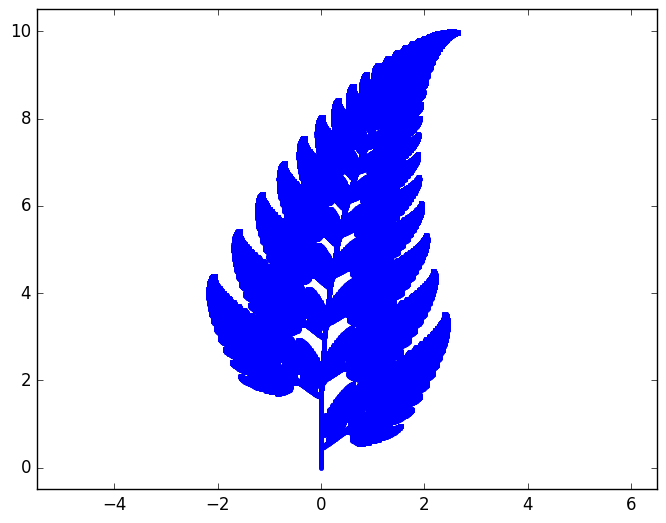

In [3]:
# plot
figure()
plot(xs, ys, linestyle="none", marker=".")
xlim(xmin,xmax)
ylim(ymin,ymax)
;